In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------
*** GP2 KUnet ***
Working directory: /tmp/tmpar8ha8zaGP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/masks.npy')

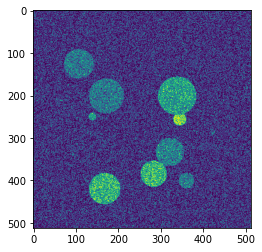

In [5]:
imshow(images[0])

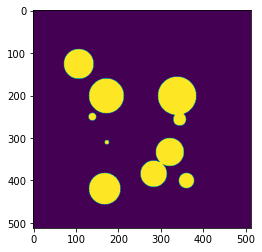

In [6]:
imshow(masks[0])

In [7]:
len(images)

10000

In [8]:
len(masks)

10000

In [9]:
images.shape

(10000, 512, 512, 1)

In [10]:
masks.shape

(10000, 512, 512, 1)

In [11]:
R.run(images=images, masks=masks, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
8/8 [==============================] - 26s 2s/step - loss: 0.9114 - dice_coeff: 0.1575 - val_loss: 0.8809 - val_dice_coeff: 0.1477
Epoch 2/100
8/8 [==============================] - 8s 1s/step - loss: 0.8720 - dice_coeff: 0.1717 - val_loss: 0.8667 - val_dice_coeff: 0.1699
Epoch 3/100
8/8 [==============================] - 8s 1s/step - loss: 0.8335 - dice_coeff: 0.1843 - val_loss: 0.9206 - val_dice_coeff: 0.1835
Epoch 4/100
8/8 [==============================] - 8s 1s/step - loss: 0.7999 - dice_coeff: 0.1954 - val_loss: 0.9674 - val_dice_coeff: 0.1942
Epoch 5/100
8/8 [==============================] - 8s 1s/step - loss: 0.7646 - dice_coeff: 0.2063 - val_loss: 0.9871 - val_dice_coeff: 0.2043
Epoch 6/100
8/8 [==============================] - 8s 1s/step - loss: 0.7338 - dice_coeff: 0.2151 - val_loss: 0.9700 - val_dice_coeff: 0.2174
Epoch 7/100
8/8 [==============================] - 8s 1s/step - loss: 0.7047 - dice_coeff: 0.2231 - val_loss: 0.9259 - va

8/8 [==============================] - 8s 1s/step - loss: 0.2798 - dice_coeff: 0.4378 - val_loss: 0.2141 - val_dice_coeff: 0.5226
Epoch 59/100
8/8 [==============================] - 8s 1s/step - loss: 0.2784 - dice_coeff: 0.4439 - val_loss: 0.2163 - val_dice_coeff: 0.5185
Epoch 60/100
8/8 [==============================] - 8s 1s/step - loss: 0.2768 - dice_coeff: 0.4384 - val_loss: 0.2767 - val_dice_coeff: 0.4999
Epoch 61/100
8/8 [==============================] - 8s 1s/step - loss: 0.2742 - dice_coeff: 0.4460 - val_loss: 0.2594 - val_dice_coeff: 0.5098
Epoch 62/100
8/8 [==============================] - 8s 1s/step - loss: 0.2706 - dice_coeff: 0.4459 - val_loss: 0.2212 - val_dice_coeff: 0.5289
Epoch 63/100
8/8 [==============================] - 8s 1s/step - loss: 0.2684 - dice_coeff: 0.4486 - val_loss: 0.2356 - val_dice_coeff: 0.5297
Epoch 64/100
8/8 [==============================] - 8s 1s/step - loss: 0.2640 - dice_coeff: 0.4525 - val_loss: 0.2141 - val_dice_coeff: 0.5360
Epoch 65/100

10/10 [==============================] - 9s 924ms/step - loss: 0.1437 - dice_coeff: 0.6078 - val_loss: 0.1013 - val_dice_coeff: 0.7291
Epoch 12/100
10/10 [==============================] - 9s 943ms/step - loss: 0.1408 - dice_coeff: 0.6158 - val_loss: 0.1094 - val_dice_coeff: 0.7395
Epoch 13/100
10/10 [==============================] - 9s 915ms/step - loss: 0.1368 - dice_coeff: 0.6189 - val_loss: 0.1032 - val_dice_coeff: 0.7499
Epoch 14/100
10/10 [==============================] - 9s 914ms/step - loss: 0.1342 - dice_coeff: 0.6269 - val_loss: 0.0865 - val_dice_coeff: 0.7589
Epoch 15/100
10/10 [==============================] - 9s 942ms/step - loss: 0.1310 - dice_coeff: 0.6365 - val_loss: 0.0897 - val_dice_coeff: 0.7612
Epoch 16/100
10/10 [==============================] - 9s 912ms/step - loss: 0.1303 - dice_coeff: 0.6369 - val_loss: 0.0834 - val_dice_coeff: 0.7642
Epoch 17/100
10/10 [==============================] - 9s 931ms/step - loss: 0.1284 - dice_coeff: 0.6430 - val_loss: 0.0894 - 

Epoch 17/100
13/13 [==============================] - 11s 850ms/step - loss: 0.0781 - dice_coeff: 0.7452 - val_loss: 0.0904 - val_dice_coeff: 0.7276
Epoch 18/100
13/13 [==============================] - 10s 822ms/step - loss: 0.0774 - dice_coeff: 0.7472 - val_loss: 0.0842 - val_dice_coeff: 0.7345
Epoch 19/100
13/13 [==============================] - 11s 835ms/step - loss: 0.0763 - dice_coeff: 0.7500 - val_loss: 0.0838 - val_dice_coeff: 0.7375
Epoch 20/100
13/13 [==============================] - 11s 843ms/step - loss: 0.0752 - dice_coeff: 0.7516 - val_loss: 0.0849 - val_dice_coeff: 0.7390
Epoch 21/100
13/13 [==============================] - 10s 817ms/step - loss: 0.0747 - dice_coeff: 0.7548 - val_loss: 0.0801 - val_dice_coeff: 0.7425
Epoch 22/100
13/13 [==============================] - 11s 864ms/step - loss: 0.0744 - dice_coeff: 0.7550 - val_loss: 0.0762 - val_dice_coeff: 0.7474
Epoch 23/100
13/13 [==============================] - 11s 847ms/step - loss: 0.0735 - dice_coeff: 0.7567 -

In [12]:
R.classifier_scores

[[0.1037314385175705, 0.7049179673194885],
 [0.11039669066667557, 0.744317889213562],
 [0.1342363953590393, 0.6982631087303162],
 [0.0806722342967987, 0.7534099221229553]]

In [13]:
R.discriminator_scores

[[1.4106385393120036e-08, 1.0],
 [1.986820485910812e-09, 1.0],
 [0.0, 1.0],
 [135.01223754882812, 0.5149999856948853]]

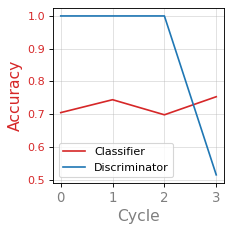

In [14]:
R.plot() #This when I run for the second time